In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
data = pd.read_csv('train.csv')

In [11]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [22]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(0, Z)

def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z_shifted)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def ReLU_deriv(Z):
  return Z > 0

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max()+1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def updated_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [23]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = updated_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 100 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.2, 500)

Iteration:  0
[8 1 1 ... 7 4 0] [0 9 5 ... 9 3 0]
0.092
Iteration:  100
[0 7 9 ... 1 3 0] [0 9 5 ... 9 3 0]
0.751219512195122
Iteration:  200
[0 7 9 ... 7 3 0] [0 9 5 ... 9 3 0]
0.8347073170731707
Iteration:  300
[0 9 9 ... 7 3 0] [0 9 5 ... 9 3 0]
0.8616829268292683
Iteration:  400
[0 9 9 ... 7 3 0] [0 9 5 ... 9 3 0]
0.8746829268292683


In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


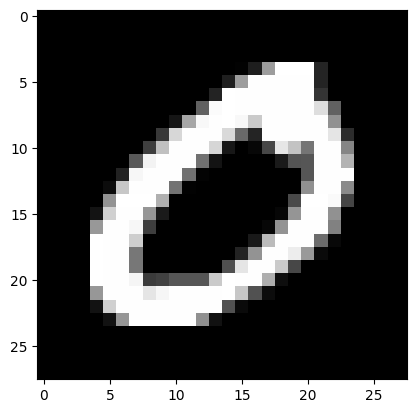

Prediction:  [9]
Label:  9


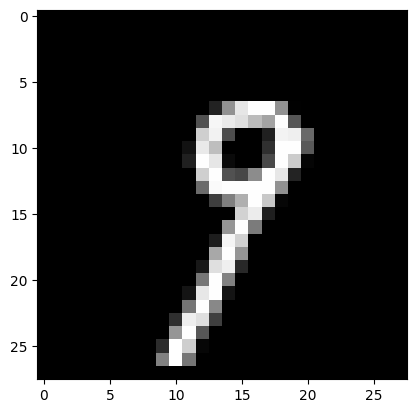

Prediction:  [9]
Label:  5


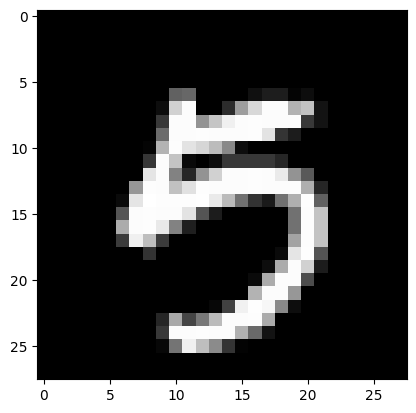

Prediction:  [1]
Label:  9


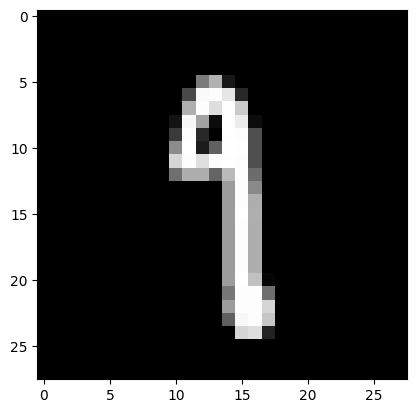

In [26]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [27]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev.flatten())

[1 9 9 3 9 0 2 0 1 3 9 3 8 3 0 8 2 0 5 0 4 5 2 2 5 2 5 4 4 1 4 9 4 2 6 3 8
 2 1 1 1 7 8 8 9 8 1 2 3 4 0 9 0 0 1 6 9 4 7 4 9 1 1 2 9 3 6 1 2 6 0 6 0 4
 1 7 7 3 2 5 5 5 3 0 1 6 5 7 1 8 0 3 4 2 2 1 4 2 8 7 4 9 6 5 9 6 0 7 1 4 0
 6 2 5 7 4 9 7 6 1 4 6 8 5 6 5 3 4 1 8 0 4 1 4 7 5 3 4 7 4 2 2 4 4 3 5 9 1
 0 0 2 5 2 9 5 0 7 9 2 2 8 1 6 8 7 4 0 5 5 9 0 5 3 1 1 2 1 2 8 1 2 4 0 4 9
 4 8 1 4 5 9 3 4 7 1 4 9 6 6 4 2 1 4 5 2 6 4 3 4 0 0 8 0 4 8 2 1 5 6 4 4 7
 2 0 1 7 0 9 8 8 1 1 0 8 2 1 0 5 0 2 6 3 8 7 9 4 6 8 9 7 0 5 3 5 6 3 9 1 8
 1 2 7 1 0 6 1 9 6 8 1 8 4 2 1 4 2 7 2 0 4 1 1 2 5 3 6 1 3 5 8 3 0 4 0 1 3
 7 9 9 7 0 4 7 4 6 9 5 8 1 2 3 4 0 8 3 5 5 0 8 2 2 9 0 4 1 5 4 5 3 1 8 5 2
 0 9 4 9 4 2 9 0 8 8 1 4 5 6 3 5 5 1 3 2 7 7 5 5 4 7 5 6 9 9 1 5 9 1 8 9 2
 6 8 1 9 1 1 3 4 6 6 0 5 5 3 0 6 1 2 2 1 7 9 7 5 6 4 0 2 8 8 4 9 6 3 2 9 9
 7 5 8 7 4 9 1 3 1 8 6 9 7 1 2 2 9 1 0 1 0 3 4 0 4 3 7 7 2 9 5 1 7 5 6 8 9
 9 8 8 5 7 9 7 1 7 1 3 6 2 9 9 9 0 1 8 8 5 0 0 6 2 7 0 2 0 9 1 7 6 8 3 3 4
 0 1 4 1 9 2 0 3 4 0 6 6 

np.float64(0.857)